# Simultaneous pose and correspondence registration

The task is to find a pose $m$ that maps a point cloud $p$ onto another point cloud $q$. More precicely the poase $m$ shall map each point $p_i$ to $m(p_i)$ such that there exist a point $q_j$ in $q$ close to $m(p_i)$. Hereby the correspondence which point of $p_i$ shall be mapped on which point in $q_i$ is unknown a priori.

The example below is a seam tracking case where a edge detected by a line scanner shall be follows when moving along the edge.



In [1]:
from geometricalgebra.tests.test_coherent_point_drift import get_test_data
from geometricalgebra.coherent_point_drift import pose_and_correspondence_registration
import matplotlib.pyplot as plt

In [2]:
p, q = get_test_data()

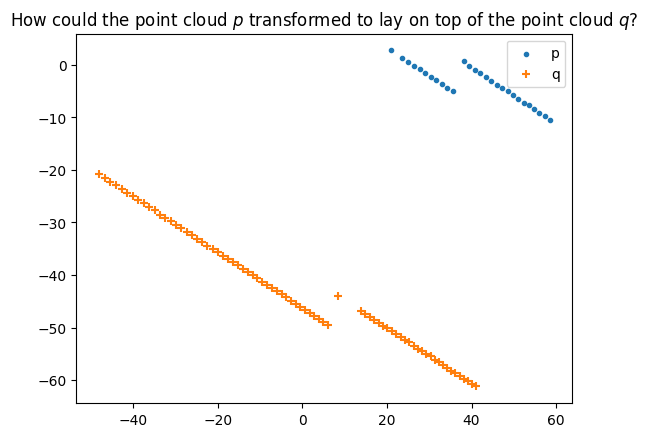

In [3]:
plt.scatter(*p.to_euclid().T, label='p', marker='.')
plt.scatter(*q.to_euclid().T, label='q', marker='+')
plt.title("How could the point cloud $p$ transformed to lay on top of the point cloud $q$?")
_ = plt.legend()

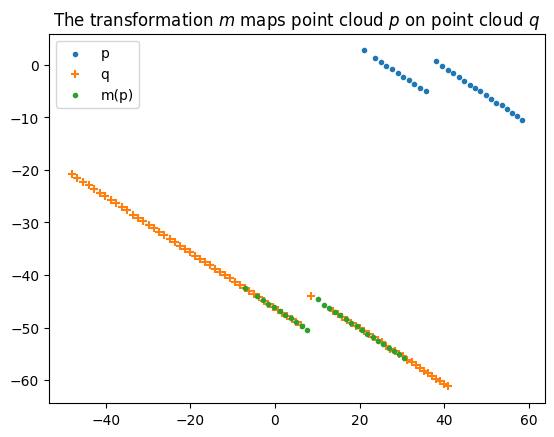

In [4]:
m, prob, variance = pose_and_correspondence_registration(p, q, only_2d=True)

plt.scatter(*p.to_euclid().T, label='p', marker='.')
plt.scatter(*q.to_euclid().T, label='q', marker='+')
plt.scatter(*m.apply(p).to_euclid().T, label='m(p)', marker='.')
plt.title("The transformation $m$ maps point cloud $p$ on point cloud $q$")
_ = plt.legend()

Text(0, 0.5, 'i')

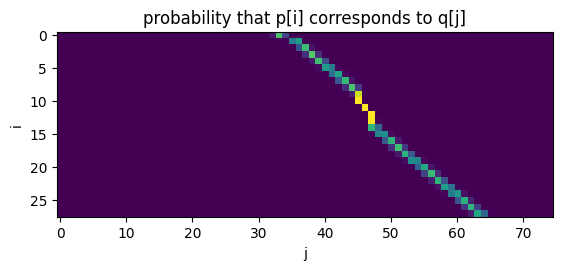

In [5]:
plt.imshow(prob)
plt.title('probability that p[i] corresponds to q[j]')
plt.xlabel('j')
plt.ylabel('i')